## W210 Capstone
### Spring 2020, Section 1

#### Team Members: Laura Chutny, Keane Johnson, Thanh Le

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

### Data Loading

In [2]:
fire_data = pd.read_csv("data/forestfires.csv") 
fuel_data = pd.read_csv("data/alt_fuel_stations.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,16,20,33,43,49,57,58,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fire_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Fine Fuel Moisture Code
The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.

#### Duff Moisture Code
The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

#### Drought Code
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

#### Initial Spread Index
The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel.

https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi

#### Temp
Temperature in Celsius degrees

#### RH
Relative humidity in %

#### Wind
Wind speed in km/h

#### Rain
Outside rain in mm/m2

#### Area
The burned area of the forest (in ha), ha = hectare = 2.47 acres

#### X
x-axis spatial coordinate within the Montesinho park map: 1 to 9 2

#### Y
y-axis spatial coordinate within the Montesinho park map: 2 to 9 3

### EDA

In [4]:
print ("** The shape of the dataset is", fire_data.shape,"**\n")

** The shape of the dataset is (517, 13) **



In [5]:
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


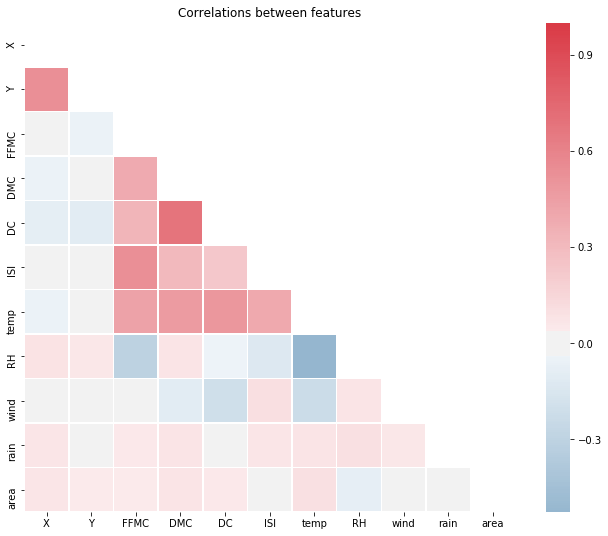

In [6]:
# plot heatmap for correlations matrix - RUN THIS CELL AS IS
corr = fire_data.corr()
fig, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
plt.title("Correlations between features")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a170a5c50>,
      dtype=object)

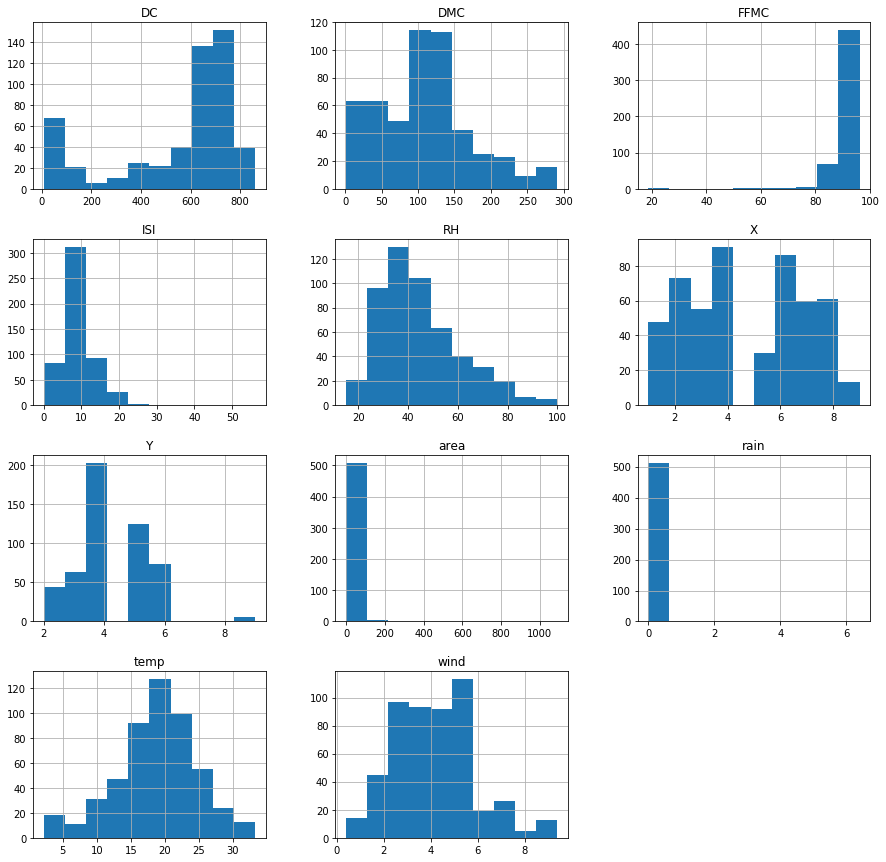

In [7]:
fire_data.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a170a5a20>]],
      dtype=object)

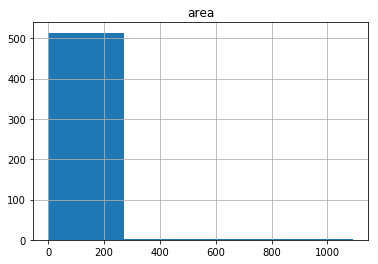

In [8]:
fire_data.hist(column = "area", bins=4)

In [25]:
fire_data.plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [28]:
fire_header = fire_data.columns
fire_header

# df_count = fuel_df.count()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [30]:
fire_feature = fire_header[4:12]
fire_feature

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], dtype='object')

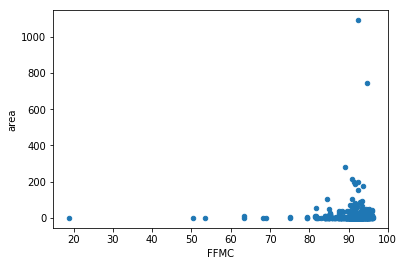

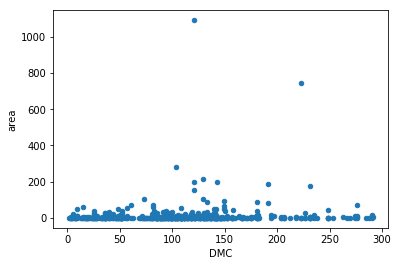

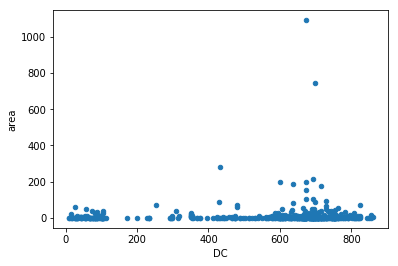

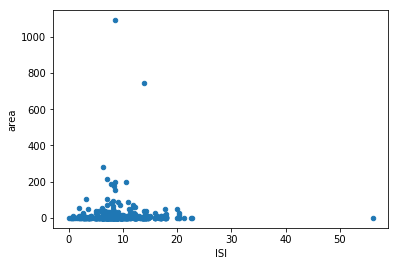

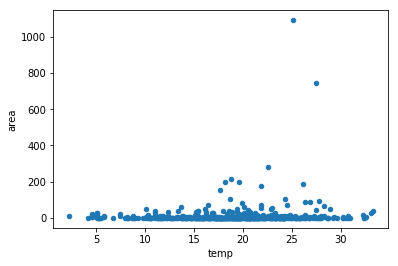

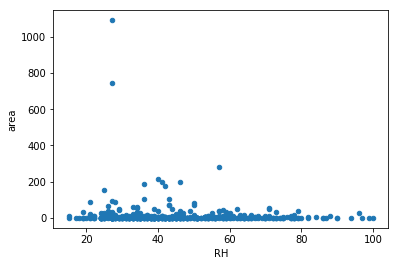

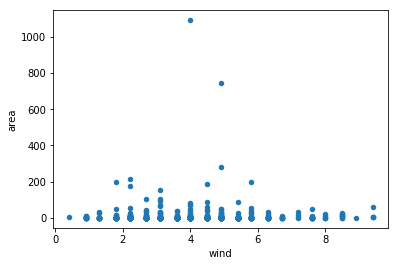

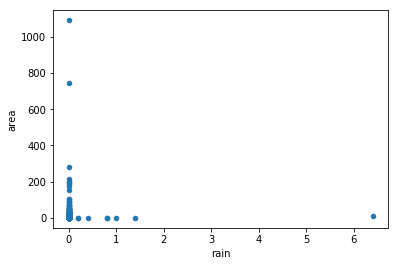

In [33]:
for feature in fire_feature:
    fire_data.plot(kind='scatter', x=feature, y="area")

In [9]:
fuel_data.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
0,CNG,Alagasco - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007,NaN,866-809-4869,E,...,NaN,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN


In [10]:
list(fuel_data)

['Fuel Type Code',
 'Station Name',
 'Street Address',
 'Intersection Directions',
 'City',
 'State',
 'ZIP',
 'Plus4',
 'Station Phone',
 'Status Code',
 'Expected Date',
 'Groups With Access Code',
 'Access Days Time',
 'Cards Accepted',
 'BD Blends',
 'NG Fill Type Code',
 'NG PSI',
 'EV Level1 EVSE Num',
 'EV Level2 EVSE Num',
 'EV DC Fast Count',
 'EV Other Info',
 'EV Network',
 'EV Network Web',
 'Geocode Status',
 'Latitude',
 'Longitude',
 'Date Last Confirmed',
 'ID',
 'Updated At',
 'Owner Type Code',
 'Federal Agency ID',
 'Federal Agency Name',
 'Open Date',
 'Hydrogen Status Link',
 'NG Vehicle Class',
 'LPG Primary',
 'E85 Blender Pump',
 'EV Connector Types',
 'Country',
 'Intersection Directions (French)',
 'Access Days Time (French)',
 'BD Blends (French)',
 'Groups With Access Code (French)',
 'Hydrogen Is Retail',
 'Access Code',
 'Access Detail Code',
 'Federal Agency Code',
 'Facility Type',
 'CNG Dispenser Num',
 'CNG On-Site Renewable Source',
 'CNG Total Compre

In [11]:
fuel_df = fuel_data[["Fuel Type Code", "Station Name", "Street Address", "City", "State", "Country", "ZIP", "Station Phone",
                     "Geocode Status", "Latitude", "Longitude"]]

In [12]:
fuel_df.head()

,Fuel Type Code,Station Name,Street Address,City,State,Country,ZIP,Station Phone,Geocode Status,Latitude,Longitude
0,CNG,Alagasco - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,US,36107,NaN,200-9,32.367916,-86.267021
1,CNG,PS Energy - Atlanta,340 Whitehall St,Atlanta,GA,US,30303,770-350-3000,200-8,33.745843,-84.398837
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,US,30324,NaN,200-8,33.821911,-84.367461
3,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,US,30336,NaN,200-9,33.760256,-84.543822
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,Houston,TX,US,77007,866-809-4869,200-9,29.779918,-95.435385


In [13]:
fuel_df.describe()

,Latitude,Longitude
count,36968.000000,36968.000000
mean,37.843426,-96.408145
std,5.189228,18.527638
min,1.000000,-159.476393
25%,34.028130,-117.260990
50%,38.553812,-92.371851
75%,41.646985,-80.875758
max,90.000000,-1.000000


In [14]:
print ("** The shape of this dataset is", fuel_df.shape,"**\n")

** The shape of this dataset is (36968, 11) **



In [15]:
type(fuel_df)

pandas.core.frame.DataFrame

In [16]:
HEADER = fuel_df.columns
FEATURES = HEADER[0:11]

df_count = fuel_df.count()

In [17]:
df_count['Station Name']

36968

In [18]:
FEATURES

Index(['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State',
       'Country', 'ZIP', 'Station Phone', 'Geocode Status', 'Latitude',
       'Longitude'],
      dtype='object')

In [19]:
#find percentage of missing values for categorical features

for feature in FEATURES:
    num_unique = fuel_df[feature].nunique()
    percent_missing = ((fuel_df[feature] == "NaN").sum() / df_count[feature] ) * 100
    print("{} has {} unique values and {:0.2f}% missing values".format(feature, num_unique, percent_missing))

Fuel Type Code has 7 unique values and 0.00% missing values
Station Name has 26144 unique values and 0.00% missing values
Street Address has 33926 unique values and 0.00% missing values
City has 5879 unique values and 0.00% missing values
State has 53 unique values and 0.00% missing values
Country has 1 unique values and 0.00% missing values
ZIP has 14953 unique values and 0.00% missing values
Station Phone has 14319 unique values and 0.00% missing values
Geocode Status has 6 unique values and 0.00% missing values
Latitude has 34820 unique values and 0.00% missing values
Longitude has 34852 unique values and 0.00% missing values


/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [20]:
a = (fuel_df["Station Phone"] == "NaN").count()

In [21]:
a

36968

In [22]:
b = list(fuel_df["Station Phone"]).count("")

In [23]:
b

0